# K-Means

### Import Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.cm as cm


### Load the iris dataset

In [63]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Number of data points:{0}".format(X.shape[0]))
print("Input data dimensions:{0}".format(X.shape[1]))
print("Number of unique classes:{0}".format(set(y)))

Number of data points:150
Input data dimensions:4
Number of unique classes:{0, 1, 2}


<ipython-input-64-446ca3a3f047>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


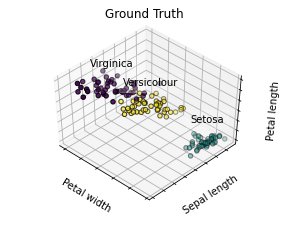

In [64]:
# Plot the ground truth
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

### Exploration

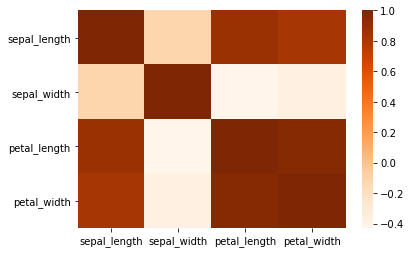

In [65]:
import seaborn as sns
df=pd.DataFrame(X, columns=['sepal_length','sepal_width','petal_length','petal_width'])
ax = sns.heatmap(np.corrcoef(df.T),xticklabels=list(df.columns), yticklabels=list(df.columns),cmap="Oranges")


#### Multicollinearity: when two input variables are strongly linearly correlated with one another. 
    
    The presence of multicollinearity does not impact euclidean distance.

#### Data Size: How to deal with a huge data say, 100 columns?

    1. Firstly, do not drop any column
    2. Reduce dimensionality e.g. principal component analysis and then perform clustering
  
    

#### What happens when you drop columns without any basis?

In [66]:
df=pd.DataFrame([[20,100,5,],[5,50,1],[10,50,2]], columns=['items', 'Revenue','frequency'], index=['player1','player2','player3'])
print(df)
print('\n')
print("Items=number of in app purchases")
print("Revenue=money spent in buying in app purchases")
print("frequency=number of times a player logs in")
print('\n')
print("Euclidean distance between player 1 and 2: {0}".format(np.round(np.sqrt(np.sum(np.square(df.iloc[0,:].values-df.iloc[1,:].values))),2)))
print("\n")
print("If \'items\' is strongly correlated with \'revenue\' and you decide to remove it")
print("\n")
print("Euclidean distance between player 1 and 2 after removing the column items: {0}".format(np.round(np.sqrt(np.sum(np.square(df.iloc[0,1:].values-df.iloc[1,1:].values)))),2))

         items  Revenue  frequency
player1     20      100          5
player2      5       50          1
player3     10       50          2


Items=number of in app purchases
Revenue=money spent in buying in app purchases
frequency=number of times a player logs in


Euclidean distance between player 1 and 2: 52.35


If 'items' is strongly correlated with 'revenue' and you decide to remove it


Euclidean distance between player 1 and 2 after removing the column items: 50.0


### Define the parameters of clustering

In [67]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_2', KMeans(n_clusters=2))]

### Plot the data

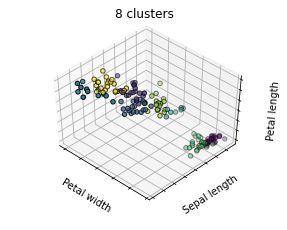

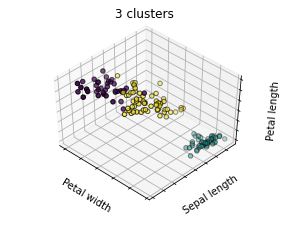

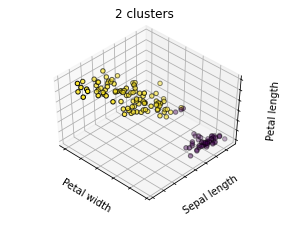

In [68]:
fignum = 1
titles = ['8 clusters', '3 clusters', '2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4,3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.6810461692117461
For n_clusters = 3 The average silhouette_score is : 0.5528190123564093
For n_clusters = 5 The average silhouette_score is : 0.488748887093105
For n_clusters = 8 The average silhouette_score is : 0.348734537721938


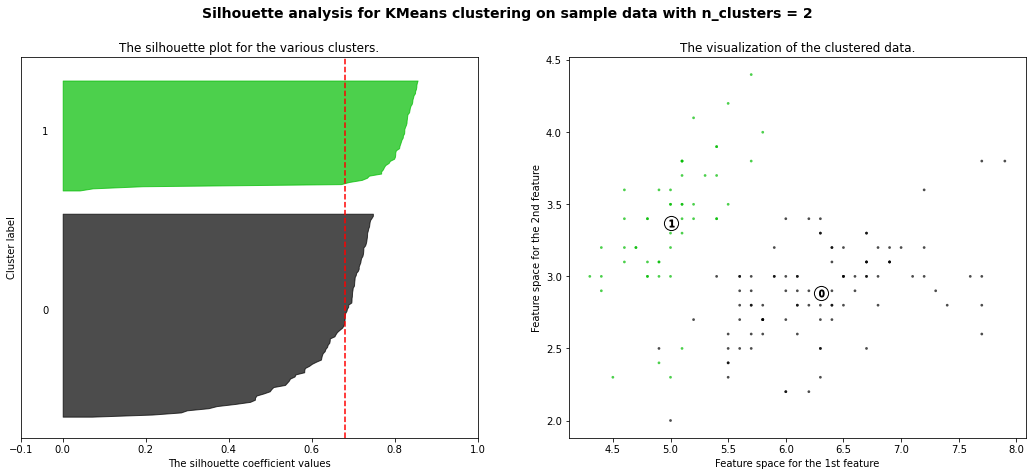

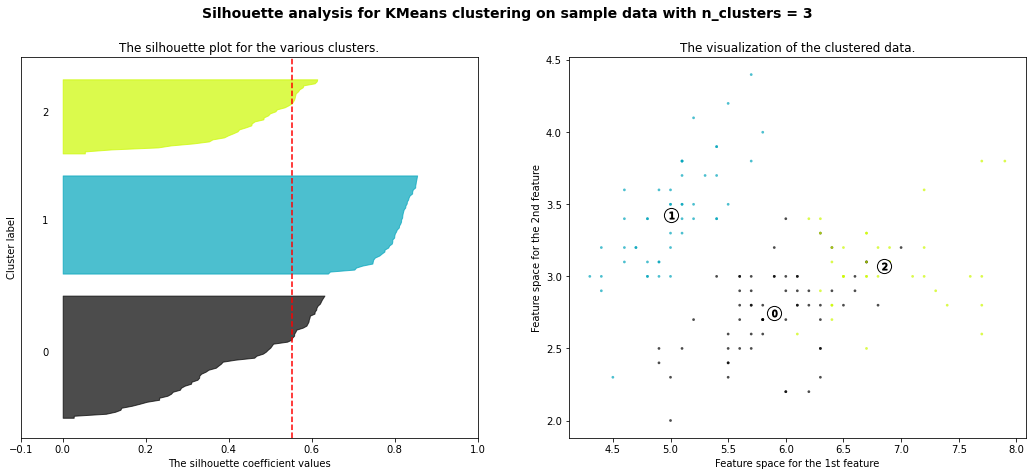

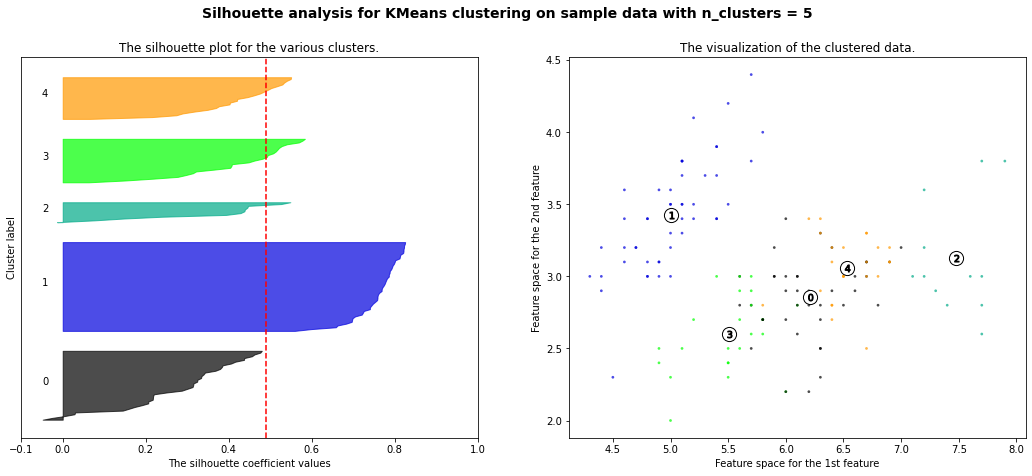

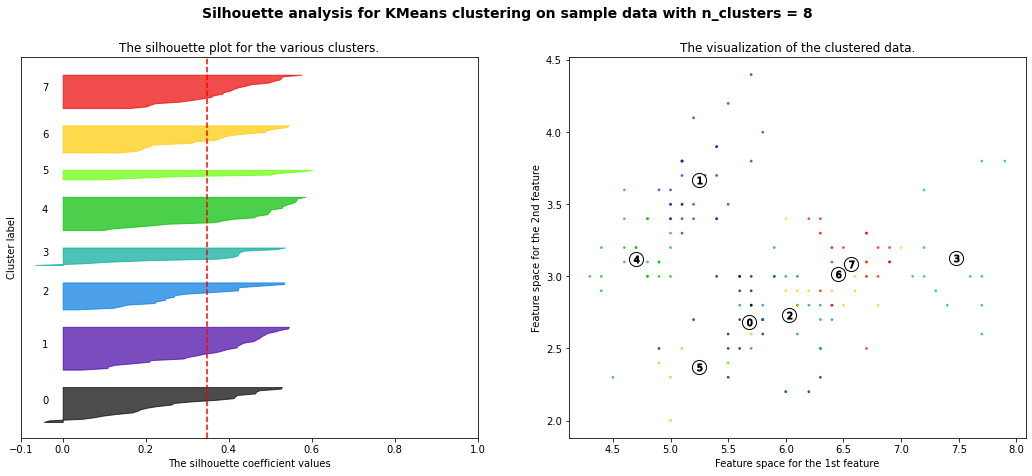

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters=[2,3,5,8]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Observations

    1. K=2 and k=3 both seem reasonable
    2. Manually inspect the two clusters and select a value of k
    

# Gaussian Mixture Models

In [70]:
from sklearn import mixture
import itertools
from scipy import linalg
import numpy as np

### Function to plot the results

In [71]:
rng = np.random.RandomState(3)
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

### Cluster

/home/deepti/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


<BarContainer object of 20 artists>

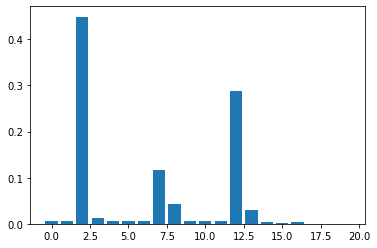

In [72]:
dpgmm = mixture.BayesianGaussianMixture(n_components=20,
                                        covariance_type='full',random_state=15).fit(X)

x=dpgmm.weights_
plt.bar(x=list(range(x.shape[0])),height=x)


    1. The model clearly gives three clusters
    2. Rule of thumb: discard clusters with less than 10% of weights

### Try with three clusters

<BarContainer object of 3 artists>

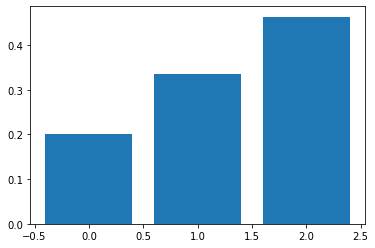

In [73]:
dpgmm = mixture.BayesianGaussianMixture(n_components=3,
                                        covariance_type='full',random_state=15).fit(X)

x=dpgmm.weights_
plt.bar(x=list(range(x.shape[0])),height=x)

# Dimensionality Reduction

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt

### Data

    1. 5000 face images
    2. size=32x32
    3. saved in ex7faces.mat
    4. Each image is flattened into 1024 columns (32x32)

#### Load and normalize data

In [75]:
X = sio.loadmat('ex7faces.mat')
X = pd.DataFrame(X['X'])
#Normalize data
X_norm = normalize(X)

In [76]:
X_norm.shape

(5000, 1024)

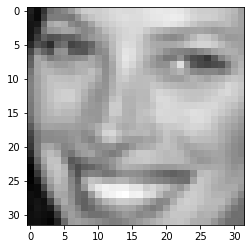

In [77]:
plt.imshow(X.loc[7,:].values.reshape(32,32).T, cmap='gray')

In [78]:

pca = PCA(.99)
#Run PCA on normalized image data
lower_dimension_data = pca.fit_transform(X_norm)

lower_dimension_data.shape

(5000, 353)

#### Observation: we have reduced 1024 into 353 columns

#### Can we recreate the data with just 353 columns?

### Back-transform the reduced dimension to the original space 

In [79]:
approximation = pca.inverse_transform(lower_dimension_data)
print(approximation.shape)
approximation = approximation.reshape(-1,32,32)
X_norm_recreated = X_norm.reshape(-1,32,32)

(5000, 1024)


### Rotate the pictures

In [80]:
for i in range(0,X_norm.shape[0]):
    X_norm_recreated[i,] = X_norm_recreated[i,].T
    approximation[i,] = approximation[i,].T

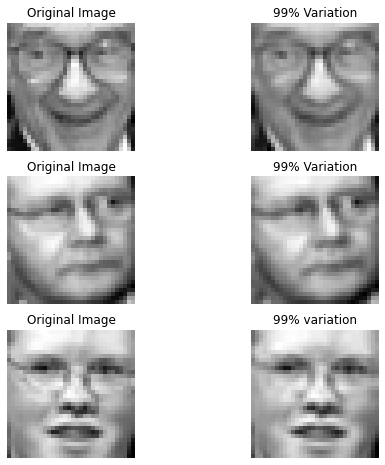

In [81]:
#Display images
fig4, axarr = plt.subplots(3,2,figsize=(8,8))
axarr[0,0].imshow(X_norm_recreated[0,],cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(approximation[0,],cmap='gray')
axarr[0,1].set_title('99% Variation')
axarr[0,1].axis('off')
axarr[1,0].imshow(X_norm_recreated[1,],cmap='gray')
axarr[1,0].set_title('Original Image')
axarr[1,0].axis('off')
axarr[1,1].imshow(approximation[1,],cmap='gray')
axarr[1,1].set_title('99% Variation')
axarr[1,1].axis('off')
axarr[2,0].imshow(X_norm_recreated[2,],cmap='gray')
axarr[2,0].set_title('Original Image')
axarr[2,0].axis('off')
axarr[2,1].imshow(approximation[2,],cmap='gray')
axarr[2,1].set_title('99% variation')
axarr[2,1].axis('off')
plt.show()

### Let's try with 80% variance

In [82]:
pca = PCA(.80)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape

(5000, 34)

### Back transform to original domension

In [83]:
approximation = pca.inverse_transform(lower_dimension_data)
print(approximation.shape)
approximation = approximation.reshape(-1,32,32)
X_norm_recreated = X_norm.reshape(-1,32,32)

(5000, 1024)


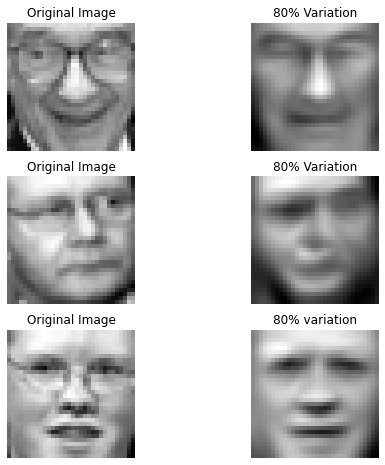

In [84]:
#Display images
fig4, axarr = plt.subplots(3,2,figsize=(8,8))
axarr[0,0].imshow(X_norm_recreated[0,],cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(approximation[0,],cmap='gray')
axarr[0,1].set_title('80% Variation')
axarr[0,1].axis('off')
axarr[1,0].imshow(X_norm_recreated[1,],cmap='gray')
axarr[1,0].set_title('Original Image')
axarr[1,0].axis('off')
axarr[1,1].imshow(approximation[1,],cmap='gray')
axarr[1,1].set_title('80% Variation')
axarr[1,1].axis('off')
axarr[2,0].imshow(X_norm_recreated[2,],cmap='gray')
axarr[2,0].set_title('Original Image')
axarr[2,0].axis('off')
axarr[2,1].imshow(approximation[2,],cmap='gray')
axarr[2,1].set_title('80% variation')
axarr[2,1].axis('off')
plt.show()

# Topic Modeling

In [85]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Extract Data

In [86]:
import io
import os.path
import re
import tarfile
import smart_open
url='https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz'
def extract_documents(url):
    fname=url.split('/')[-1]
    if not os.path.isfile(fname):
        with smart_open.open(url, "rb") as fin:
            with smart_open.open(fname, 'wb') as fout:
                while True:
                    buf = fin.read(io.DEFAULT_BUFFER_SIZE)
                    if not buf:
                        break
                    fout.write(buf)
    with tarfile.open(fname, mode='r:gz') as tar:
        # Ignore directory entries, as well as files like README, etc.
        files = [
            m for m in tar.getmembers()
            if m.isfile() and re.search(r'nipstxt/nips\d+/\d+\.txt', m.name)
        ]
        for member in sorted(files, key=lambda x: x.name):
            member_bytes = tar.extractfile(member).read()
            yield member_bytes.decode('utf-8', errors='replace')
            
docs = list(extract_documents(url))
print("Number of documents:{0}".format(len(docs)))

Number of documents:1740


In [87]:
print(docs[0][:500])

1 
CONNECTIVITY VERSUS ENTROPY 
Yaser S. Abu-Mostafa 
California Institute of Technology 
Pasadena, CA 91125 
ABSTRACT 
How does the connectivity of a neural network (number of synapses per 
neuron) relate to the complexity of the problems it can handle (measured by 
the entropy)? Switching theory would suggest no relation at all, since all Boolean 
functions can be implemented using a circuit with very low connectivity (e.g., 
using two-input NAND gates). However, for a network that learns a pr


### Pre-process and vectorize the documents

To preprocess the documents:
    
    1. Tokenize (split the documents into tokens).
    2. Lemmatize the tokens
    3. Compute bigrams
    4. Compute a bag-of-words representation of the data

### Tokenize

Break a document into a list of words

In [88]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx]=docs[idx].lower()
    docs[idx]=tokenizer.tokenize(docs[idx])
    
# remove alphanumeric words
docs=[[token for token in doc if not token.isnumeric()] for doc in docs]

# remove words with length 1, e.g. 'a'
docs=[[token for token in doc if len(token)>1] for doc in docs]

docs[0][:10]

['connectivity',
 'versus',
 'entropy',
 'yaser',
 'abu',
 'mostafa',
 'california',
 'institute',
 'of',
 'technology']

### Lemmatize

'walk', 'walked', 'walks' or 'walking' have the same lemma

In [89]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]


### Bigrams

    1. Bigrams are sets of two adjacent words.
    2. We can get phrases like "artificial_intelligence"

In [90]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2020-10-29 20:12:20,597 : INFO : collecting all words and their counts
2020-10-29 20:12:20,598 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2020-10-29 20:12:26,742 : INFO : collected 1120198 word types from a corpus of 4629808 words (unigram + bigrams) and 1740 sentences
2020-10-29 20:12:26,743 : INFO : using 1120198 counts as vocab in Phrases<0 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>


### Remove words that appear less than 20 times

In [91]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

2020-10-29 20:13:26,947 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-10-29 20:13:29,544 : INFO : built Dictionary(79429 unique tokens: ['0a', '2h', '2h2', '2he', '2n']...) from 1740 documents (total 4953968 corpus positions)
2020-10-29 20:13:29,615 : INFO : discarding 70785 tokens: [('0a', 19), ('2h', 16), ('2h2', 1), ('2he', 3), ('__c', 2), ('_k', 6), ('a', 1740), ('about', 1058), ('abstract', 1740), ('after', 1087)]...
2020-10-29 20:13:29,616 : INFO : keeping 8644 tokens which were in no less than 20 and no more than 870 (=50.0%) documents
2020-10-29 20:13:29,651 : INFO : resulting dictionary: Dictionary(8644 unique tokens: ['2n', '_c', 'a2', 'a_follows', 'ability']...)


### Frequency of each word

In [92]:
# compute the frequency of each word
corpus = [dictionary.doc2bow(doc) for doc in docs]
corpus[0][:10]

[(0, 4),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 4),
 (6, 4),
 (7, 1),
 (8, 1),
 (9, 1)]

### Training

Training parameters:
    
    1. How many topics? (7)
    2. CHUNKSIZE (batch_size):how many documents are processed at a time in the training algorithm
    3. PASSES (epochs): how often we train the model on the entire corpus?
    4. alpha = 'auto' and eta = 'auto'
    

In [93]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 7
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2020-10-29 20:13:40,616 : INFO : using autotuned alpha, starting with [0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715]
2020-10-29 20:13:40,618 : INFO : using serial LDA version on this node
2020-10-29 20:13:40,623 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 1740 documents, updating model once every 1740 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-10-29 20:13:40,624 : INFO : PROGRESS: pass 0, at document #1740/1740
2020-10-29 20:13:49,708 : INFO : optimized alpha [0.103039995, 0.097272605, 0.10276507, 0.10865083, 0.1278072, 0.102359906, 0.09780566]
2020-10-29 20:13:49,712 : INFO : topic #1 (0.097): 0.005*"image" + 0.005*"node" + 0.003*"component" + 0.003*"class" + 0.003*"neuron" + 0.003*"sequence" + 0.003*"control" + 0.003*"approximation" + 0.003*"matrix" + 0.002*"solution"
2020-10-29 20:13:49,713 : INFO : topic #6 (0.098): 0.004

2020-10-29 20:14:10,144 : INFO : topic #2 (0.058): 0.015*"neuron" + 0.014*"cell" + 0.006*"response" + 0.006*"stimulus" + 0.005*"activity" + 0.005*"spike" + 0.005*"synaptic" + 0.004*"visual" + 0.004*"field" + 0.004*"firing"
2020-10-29 20:14:10,145 : INFO : topic #1 (0.062): 0.005*"bound" + 0.005*"class" + 0.005*"node" + 0.004*"let" + 0.004*"matrix" + 0.004*"approximation" + 0.004*"theorem" + 0.004*"image" + 0.003*"xi" + 0.003*"tree"
2020-10-29 20:14:10,146 : INFO : topic diff=0.140380, rho=0.377964
2020-10-29 20:14:10,151 : INFO : PROGRESS: pass 6, at document #1740/1740
2020-10-29 20:14:13,014 : INFO : optimized alpha [0.055933293, 0.061385196, 0.055876568, 0.053915586, 0.054588635, 0.048736412, 0.043679416]
2020-10-29 20:14:13,019 : INFO : topic #6 (0.044): 0.011*"control" + 0.007*"action" + 0.005*"policy" + 0.005*"optimal" + 0.005*"trajectory" + 0.005*"reinforcement" + 0.005*"dynamic" + 0.005*"controller" + 0.003*"reinforcement_learning" + 0.003*"cost"
2020-10-29 20:14:13,020 : INFO 

2020-10-29 20:14:25,899 : INFO : topic #3 (0.054): 0.009*"hidden" + 0.006*"net" + 0.006*"layer" + 0.005*"hidden_unit" + 0.004*"gradient" + 0.004*"node" + 0.004*"memory" + 0.004*"generalization" + 0.004*"dynamic" + 0.004*"solution"
2020-10-29 20:14:25,900 : INFO : topic #0 (0.057): 0.011*"image" + 0.008*"object" + 0.008*"recognition" + 0.006*"word" + 0.006*"layer" + 0.005*"rule" + 0.005*"hidden" + 0.004*"trained" + 0.004*"human" + 0.004*"visual"
2020-10-29 20:14:25,901 : INFO : topic #1 (0.063): 0.006*"bound" + 0.005*"class" + 0.005*"let" + 0.004*"matrix" + 0.004*"theorem" + 0.004*"node" + 0.004*"approximation" + 0.004*"xi" + 0.003*"sample" + 0.003*"tree"
2020-10-29 20:14:25,902 : INFO : topic diff=0.096816, rho=0.277350
2020-10-29 20:14:25,913 : INFO : PROGRESS: pass 12, at document #1740/1740
2020-10-29 20:14:28,374 : INFO : optimized alpha [0.057198096, 0.06367334, 0.05188936, 0.054286208, 0.048948046, 0.048360847, 0.038078852]
2020-10-29 20:14:28,379 : INFO : topic #6 (0.038): 0.013

2020-10-29 20:14:40,406 : INFO : topic #4 (0.048): 0.011*"circuit" + 0.010*"signal" + 0.009*"chip" + 0.008*"analog" + 0.007*"neuron" + 0.006*"image" + 0.005*"voltage" + 0.004*"vlsi" + 0.004*"implementation" + 0.004*"bit"
2020-10-29 20:14:40,408 : INFO : topic #3 (0.059): 0.009*"hidden" + 0.006*"net" + 0.006*"layer" + 0.005*"hidden_unit" + 0.004*"gradient" + 0.004*"node" + 0.004*"memory" + 0.004*"dynamic" + 0.004*"generalization" + 0.004*"solution"
2020-10-29 20:14:40,409 : INFO : topic #0 (0.062): 0.014*"image" + 0.009*"recognition" + 0.008*"object" + 0.006*"word" + 0.006*"layer" + 0.005*"rule" + 0.004*"trained" + 0.004*"hidden" + 0.004*"human" + 0.003*"character"
2020-10-29 20:14:40,410 : INFO : topic #1 (0.069): 0.006*"bound" + 0.006*"class" + 0.006*"let" + 0.005*"theorem" + 0.005*"matrix" + 0.004*"approximation" + 0.004*"node" + 0.004*"xi" + 0.003*"sample" + 0.003*"tree"
2020-10-29 20:14:40,411 : INFO : topic diff=0.066697, rho=0.229416
2020-10-29 20:14:40,417 : INFO : PROGRESS: pas

In [191]:
model.print_topic(0, topn=10)

'0.005*"matrix" + 0.005*"gaussian" + 0.005*"approximation" + 0.004*"estimate" + 0.004*"noise" + 0.004*"density" + 0.004*"mixture" + 0.004*"component" + 0.004*"hidden" + 0.004*"optimal"'

In [192]:
model.print_topic(2, topn=10)

'0.023*"neuron" + 0.010*"spike" + 0.010*"cell" + 0.009*"synaptic" + 0.008*"activity" + 0.008*"firing" + 0.006*"potential" + 0.005*"connection" + 0.004*"memory" + 0.004*"synapsis"'

### Word Clouds of Top N Keywords in Each Topic

In [ ]:
!pip install wordcloud

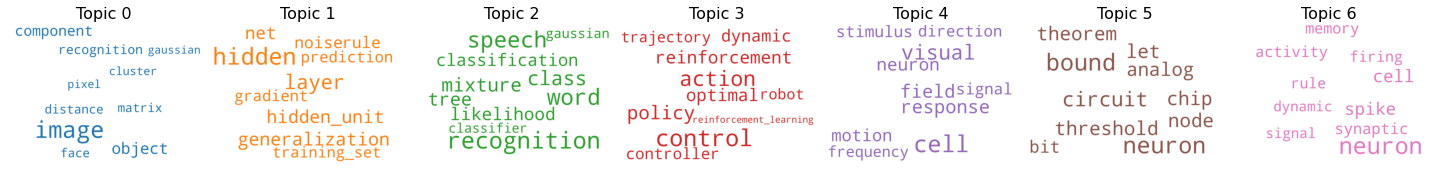

In [201]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 7, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [204]:
#!pip install pyLDAvis
#!pip install gensim

In [202]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary=dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.072822 -0.018654       1        1  17.758393
5     -0.026156 -0.112547       2        1  14.546731
4      0.182889  0.040332       3        1  14.264949
0     -0.014211  0.090169       4        1  14.212829
2     -0.111334  0.078313       5        1  13.747504
6      0.106759 -0.039170       6        1  13.656047
3     -0.065125 -0.038442       7        1  11.813547, topic_info=            Term         Freq        Total Category  logprob  loglift
1655       image  6918.000000  6918.000000  Default  30.0000  30.0000
242       neuron  8518.000000  8518.000000  Default  29.0000  29.0000
68          cell  5996.000000  5996.000000  Default  28.0000  28.0000
390       visual  3295.000000  3295.000000  Default  27.0000  27.0000
1820      speech  2658.000000  2658.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1032    solution   609.685630  3465.746612   Topic7  -5.9809   0.3982
1849  transition   519.406272  1522.491775   Topic7  -6.1411   1.0605
326       search   528.039115  1787.275581   Topic7  -6.1246   0.9166
276     position   535.400700  2592.631338   Topic7  -6.1108   0.5585
321       sample   535.342382  3248.171060   Topic7  -6.1109   0.3330

[557 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1882      1  0.023388     3d
1882      2  0.014617     3d
1882      3  0.073086     3d
1882      4  0.821488     3d
1882      6  0.017541     3d
...     ...       ...    ...
1872      7  0.558039     xt
8171      3  0.043336  zemel
8171      4  0.922442  zemel
8171      6  0.018573  zemel
8171      7  0.006191  zemel

[2192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 1, 3, 7, 4])

# Recommendation system

In [149]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD
import warnings

### Load data

In [150]:
books = pd.read_csv('books.csv', sep=',')
books = books.iloc[:, :16]
books = books.drop(columns=['title', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'original_publication_year','language_code','work_ratings_count','work_text_reviews_count'])
books.head(5)
ratings = pd.read_csv('ratings.csv', sep=',')
ratings.head(5)
df = pd.merge(ratings, books, on="book_id")
df.head(5)


book_id  user_id  rating  id                      authors  \
0        1      314       5  27  J.K. Rowling, Mary GrandPré   
1        1      439       3  27  J.K. Rowling, Mary GrandPré   
2        1      588       5  27  J.K. Rowling, Mary GrandPré   
3        1     1169       4  27  J.K. Rowling, Mary GrandPré   
4        1     1185       4  27  J.K. Rowling, Mary GrandPré   

                           original_title  average_rating  ratings_count  
0  Harry Potter and the Half-Blood Prince            4.54        1678823  
1  Harry Potter and the Half-Blood Prince            4.54        1678823  
2  Harry Potter and the Half-Blood Prince            4.54        1678823  
3  Harry Potter and the Half-Blood Prince            4.54        1678823  
4  Harry Potter and the Half-Blood Prince            4.54        1678823

### Drop duplicates

In [151]:
df1= df.drop_duplicates(['user_id','original_title'])
df1= df.drop_duplicates(['user_id','book_id'])
df1.head(10) 
df1.shape 

(79531, 8)

### Transform the dataframe into user-books matrix

In [152]:
books_users = df1.pivot_table(index = 'user_id', columns = 'original_title', values = 'rating').fillna(0)
books_users.shape #(28554, 794)
books_users.head()

original_title        Animal Farm & 1984   Carter Beats the Devil  \
user_id                                                             
2               0.0                  0.0                      0.0   
3               0.0                  0.0                      0.0   
4               0.0                  0.0                      0.0   
7               0.0                  0.0                      0.0   
9               0.0                  0.0                      0.0   

original_title   The Fellowship of the Ring  \
user_id                                       
2                                       0.0   
3                                       0.0   
4                                       0.0   
7                                       0.0   
9                                       0.0   

original_title   めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]  \
user_id                                                       
2                                                       0.0   
3                                                       0.0   
4                                                       0.0   
7                                                       0.0   
9                                                       0.0   

original_title  'Salem's Lot The Illustrated Edition  'Tis: A Memoir  \
user_id                                                                
2                                                0.0             0.0   
3                                                0.0             0.0   
4                                                0.0             0.0   
7                                                0.0             0.0   
9                                                0.0             0.0   

original_title  1421: The Year China Discovered America  1776  31 Songs  ...  \
user_id                                                                  ...   
2                                                   0.0   0.0       0.0  ...   
3                                                   0.0   0.0       0.0  ...   
4                                                   0.0   0.0       0.0  ...   
7                                                   0.0   0.0       0.0  ...   
9                                                   0.0   0.0       0.0  ...   

original_title  Ἰλιάς ; Ὀδύσσεια  Ἰστορίαι  Ὀδύσσεια  Ὀρέστεια  \
user_id                                                          
2                            0.0       0.0       0.0       0.0   
3                            0.0       0.0       0.0       0.0   
4                            0.0       0.0       0.0       0.0   
7                            0.0       0.0       0.0       5.0   
9                            0.0       0.0       0.0       0.0   

original_title  …trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager  \
user_id                                                                                       
2                                                             0.0                             
3                                                             0.0                             
4                                                             0.0                             
7                                                             0.0                             
9                                                             0.0                             

original_title  スプートニクの恋人 [Supūtoniku no Koibito]  海辺のカフカ [Umibe no Kafuka]  \
user_id                                                                       
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   
7                                             0.0                       0.0   
9                                             0.0                       0.0

In [153]:
books_users.shape

(28554, 794)

####  Books_matrix 
    1. users are along rows
    2. books along columns

### Fit the Model

In [154]:
SVD = TruncatedSVD(n_components=12, random_state=0)
books = SVD.fit_transform(books_users.values.T)
books.shape 

(794, 12)

In [42]:
users=SVD.components_
users.shape

(12, 28554)

In [47]:
books_users.shape

(28554, 794)

#### Observations

    1. Each book and each user are represented by a 12-D vector
    2. books_users=users * books
    3. Similarity between vectors: correlation, cosine similarity
    4. Similar books will have strong correlation

### We will use correlation between vectors to measure similarity

In [155]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)#to avoid RuntimeWarning #Base class for warnings about dubious runtime behavior.
corr = np.corrcoef(books)
corr.shape

(794, 794)

### Recommend Books

In [43]:
title = books_matrix.columns
title_list = list(title)


In [158]:
print('Enter a book you like')
x = input()

Enter a book you like
The Lord of the Rings


In [160]:
book = title_list.index(x)
corr_book = corr[book]
print('your recommendations are:')
list(title[(corr_book >= 0.9) & (corr_book<0.99)])

your recommendations are:


['Harry Potter Collection (Harry Potter, #1-6)',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Order of the Phoenix',
 "Harry Potter and the Philosopher's Stone",
 'Harry Potter and the Prisoner of Azkaban',
 'Hatchet',
 'Notes from a Small Island',
 'The Lord of the Rings: Weapons and Warfare',
 "The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story"]